In [7]:
import numpy as np
from scipy.stats import norm
from statsmodels.stats.weightstats import ztest

In [8]:
np.random.seed(0)

In [9]:
N=100
mu=0.2
sigma=1
x=np.random.randn(N)*sigma+mu

In [10]:
x

array([ 1.96405235,  0.60015721,  1.17873798,  2.4408932 ,  2.06755799,
       -0.77727788,  1.15008842,  0.04864279,  0.09678115,  0.6105985 ,
        0.34404357,  1.65427351,  0.96103773,  0.32167502,  0.64386323,
        0.53367433,  1.69407907, -0.00515826,  0.5130677 , -0.65409574,
       -2.35298982,  0.8536186 ,  1.0644362 , -0.54216502,  2.46975462,
       -1.25436567,  0.24575852,  0.01281615,  1.73277921,  1.66935877,
        0.35494743,  0.57816252, -0.68778575, -1.78079647, -0.14791215,
        0.35634897,  1.43029068,  1.40237985, -0.18732682, -0.10230275,
       -0.84855297, -1.22001794, -1.50627019,  2.1507754 , -0.30965218,
       -0.2380743 , -1.05279536,  0.97749036, -1.41389785, -0.01274028,
       -0.69546656,  0.5869025 , -0.31080514, -0.98063218,  0.17181777,
        0.62833187,  0.26651722,  0.5024719 , -0.43432209, -0.16274117,
       -0.47246045, -0.15955316, -0.61314628, -1.5262826 ,  0.37742614,
       -0.20178094, -1.43019835,  0.66278226, -0.70729836,  0.25

In [12]:
# two-sided test
ztest(x)

(2.5648404153513686, 0.01032232684881584)

In [24]:
# two-sided test
mu_hat = x.mean()
sigma_hat = x.std(ddof=1)
z = mu_hat/(sigma_hat/np.sqrt(N)) # our mu0 = 0
p_right = 1-norm.cdf(np.abs(z))
p_left = norm.cdf(-np.abs(z))
p = p_right+p_left
z,p


(2.564840415351368, 0.010322326848815901)

In [31]:
print('z:',z)
print('absolute z:',np.abs(z))
print('p_right:',p_right)
print('p_left:',p_left)
print('p:',z)


z: 2.564840415351368
absolute z: 2.564840415351368
p_right: 0.005161163424407977
p_left: 0.005161163424407924
p: 2.564840415351368


In [26]:
# note: you can use norm.sf instead of 1-norm.cdf

In [27]:
# one-sided test
ztest(x, alternative='larger')

(2.5648404153513686, 0.00516116342440792)

In [28]:
# one-sided test
mu_hat = x.mean()
sigma_hat = x.std(ddof=1)
z = mu_hat/(sigma_hat/np.sqrt(N)) # our mu0 = 0
p = 1-norm.cdf(z)
z,p

(2.564840415351368, 0.005161163424407977)

In [29]:
print('z:',z)
# print('p_right:',p_right)
# print('p_left:',p_left)
print('p:',z)


z: 2.564840415351368
p: 2.564840415351368


In [30]:
# null under a different reference value
mu0 = 0.2
ztest(x,value=mu0)

(0.5904283402851699, 0.5549035151647227)

In [32]:
# null under a different reference value
mu_hat = x.mean()
sigma_hat = x.std(ddof=1)
z = (mu_hat-mu0)/(sigma_hat/np.sqrt(N))
p_right = 1-norm.cdf(np.abs(z))
p_left = norm.cdf(-np.abs(z))
p = p_right+p_left
z,p

(0.5904283402851698, 0.5549035151647228)

In [34]:
# two-sample test
N0 = 100
mu0 = 0.2
sigma0 = 1
x0 = np.random.randn(N)*sigma0 + mu0

N1 = 100
mu1 = 0.5
sigma1 = 1
x1 = np.random.randn(N)*sigma1 + mu1


In [36]:
ztest(x0,x1)

(-3.4596690589176347, 0.0005408396500607681)

In [37]:
# two-sample test implementation
mu_hat0 = x0.mean()
mu_hat1 = x1.mean()

dmu_hat = mu_hat1-mu_hat0
s2_hat0 = x0.var(ddof=1)
s2_hat1 = x1.var(ddof=1)
s_hat = np.sqrt(s2_hat0/N0 + s2_hat1/N1)
z = dmu_hat / s_hat #reference value is 0
p_right = 1-norm.cdf(np.abs(z))
p_left = norm.cdf(-np.abs(z))
p = p_right + p_left
z, p

(3.4596690589176347, 0.0005408396500607832)

In [38]:
# show that we will reject the null hypothesis when the 
# null hypothesis is true (false alarm) 5% of the time

num_tests = 10000
results = np.zeros(num_tests)
for i in range(num_tests):
    x1 = np.random.randn(100)
    x2 = np.random.randn(100)
    z,p = ztest(x1,x2)
    results[i] = (p<0.05)

print(results.mean())

0.0527


In [43]:
# !wget https://lazyprogrammer.me/course_files/titanic_train.csv

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
df = pd.read_csv('data/titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [47]:
df[df['Survived']==1].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [53]:
x1 = df[df['Survived']==1]['Fare'].dropna().to_numpy()

In [54]:
x2 = df[df['Survived']==0]['Fare'].dropna().to_numpy()

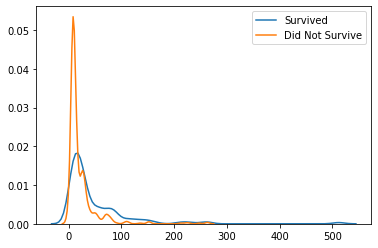

In [55]:
sns.kdeplot(x1,label='Survived')
sns.kdeplot(x2,label='Did Not Survive')
plt.legend();

In [56]:
x1.mean(), x2.mean()

(48.39540760233918, 22.117886885245902)

In [57]:
ztest(x1,x2)

(7.939191660871055, 2.035031103573989e-15)

In [58]:
pd.read_csv('data/advertisement_clicks.csv')

,advertisement_id,action
0,B,1
1,B,1
2,A,0
3,B,0
4,A,1
...,...,...
1995,A,0
1996,A,0
1997,A,0
1998,A,1
